In [144]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

# 1. tensorflow v2.xx에서 v1사용하기

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # v2를 비활성화하고 v1활성화 
import numpy as np
import pandas as pd

## Tensorflow
- 데이터 흐름 그래프 (tensor 객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성)
    - node : 작업 또는 연산 
    - edge : 데이터 흐름 / 종속 관계 
- <span style="color:red; font-size: 16px;"> tf.Session()으로 실행</span>
- <span style="color:red; font-size: 16px;"> sess.run()을 통해 값을 확인</span>

In [7]:
# tensor = data(상수, 변수)와 연산 
node1 = tf.constant('Hello, Tensorflow') #문자 node , 구동시키려면 tf.Session()으로 실행
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [13]:
# 간단한 연산 tensor  그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)# node 1,2,3은 구동시켜야 나옴 

#구동하기 위한 Session 만들기 
sess = tf.Session()
print(sess.run([node1,node2, node3]))

[10.0, 20.0, 30.0]


In [15]:
# 타입 변경 하기
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16) # 여러개 값을 넣으려면 반드시 np.array로 해야함
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [17]:
# 평균값 계산 tf.reduce_mean()
data = np.array([1.,2.,3.])
tensor = tf.reduce_mean(data) #그래프 정의 / 활성화 되진않았음
#활성화 하기위해
sess = tf.Session()
sess.run(tensor)

2.0

In [38]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([2]) # 평균0, 표준편차가 1인 난수 실수 2개(정규분포를 이루는 난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([2.3176014 , 0.35246396], dtype=float32),
 array([-0.6231193], dtype=float32)]

In [45]:
w = tf.Variable(tf.random.normal([1]))  # 처음 세팅된 고정된 값이 아닌 변동값(# 초기값은 랜덤이지만 변할 수 있음)
# tf.Variable: 변할 수 있음 / tf.constant: 변하지 않음

sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화 작업 
sess.run(w)

array([0.36455524], dtype=float32)

# 2.tensorflow  v1을 이용한 linear regression을 구현
## 2.1 입력(독립)변수 x가 1개, 타겟(종속)변수 y가 1개

In [46]:
x = np.array([1,2,3])
y = np.array([2,3,4])

# weight와 bias(처음에는 랜덤값으로 세팅, 학습 과정에서 변경)
# 독립변수가 많아지면 x가 여러개 y=w1+x1 + w2+x2 + b 
# 나타나야 할 종속 변수가 여러개면 bias(b)가 여러개 

#W.b 값 세팅 (초기 랜던감 세팅-> 학습하면서 변경될 값)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis :예측값 
H = W*x + b
# cost function(손실함수)
cost = tf.reduce_mean(tf.square(H-y)) #H-y의 제곱의 평균 

'''
학습목적 : cost가 최소가 되는 W,b를 찾아내는 것
cost는 2차함수이므로 곡선그래프로 출력. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강) W,b 바꿔가는것
=> GradientDescentOptimizer : 조금씩 이동하며 조정하는 최적화 도구
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) # 0.01씩 W,b값을 이동하는것 (학습률)
train = optimizer.minimize(cost) # cost라는 손실 함수를 최소화하도록 W, b 등의 값을 자동으로 업데이트하는 연산
# Sesstion 생성
sess = tf.Session()
# W,b 값 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습 (v2에서는 fit함수)
for step in range(5001): #for문 5000번 수행
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b]) 
    #cost가 줄어드는지, W,b값은 어떤지 확인 필요 4개의 값을 4개에 각각 할당
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                                   cost_val,
                                                   W_val,
                                                   b_val))

0번째 cost:45.0183219909668, W:[-1.0908678], b:[-0.5347255]
200번째 cost:0.014612540602684021, W:[1.1400598], b:[0.6816111]
400번째 cost:0.005579769611358643, W:[1.0865483], b:[0.8032553]
600번째 cost:0.0021306260023266077, W:[1.0534817], b:[0.8784238]
800번째 cost:0.0008135768584907055, W:[1.0330484], b:[0.9248733]
1000번째 cost:0.00031066927476786077, W:[1.020422], b:[0.9535759]
1200번째 cost:0.000118624659080524, W:[1.0126194], b:[0.9713132]
1400번째 cost:4.5296776079339907e-05, W:[1.007798], b:[0.9822733]
1600번째 cost:1.729717587295454e-05, W:[1.0048188], b:[0.98904574]
1800번째 cost:6.60530713503249e-06, W:[1.0029778], b:[0.99323076]
2000번째 cost:2.5223282591468887e-06, W:[1.0018402], b:[0.99581695]
2200번째 cost:9.635946298658382e-07, W:[1.0011375], b:[0.99741465]
2400번째 cost:3.683523175368464e-07, W:[1.0007035], b:[0.9984014]
2600번째 cost:1.410060121997958e-07, W:[1.0004352], b:[0.99901104]
2800번째 cost:5.4046328301637914e-08, W:[1.0002693], b:[0.9993878]
3000번째 cost:2.074881422231556e-08, W:[1.000167]

In [47]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W,b])

[array([1.0000087], dtype=float32), array([0.9999811], dtype=float32)]

In [48]:
input_x = int(input('입력값은 ?'))

입력값은 ?2


In [51]:
W_, b_ = sess.run([w,b])
W_[0], b_[0]

(0.059985068, 0.9999811)

In [54]:
def predict(x):
    return W_[0]*x + b_[0]

In [55]:
input_x = int(input('입력값은 ?'))
print('예측값은 ', predict(input_x))

입력값은 ?3
예측값은  1.179936308413744


## 2.2 predict를 위한 placeholder이용
- placeholder : tensorflow 외부에서 데이터를 입력받는 노드

In [59]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1*x + 1  # x에는 값이 없고 외부에서 입력받을 예정
sess = tf.Session()
# sess = tf.Session(H) #x의 값을 받지못하여 에러 발생
sess.run(H, feed_dict={x:5}) # feed_dict x의 기본값
sess.run(H,feed_dict={x:np.array([1,2,3])})

array([2., 3., 4.], dtype=float16)

In [68]:
# H = 2x+1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])

# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W,b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수 
cost = tf.reduce_mean(tf.square(H-y))
# 결사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W,b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step,
                                                 cost_val,
                                                 W_val,
                                                 b_val
        ))

0째 : cost:96.3122329711914, W:[1.1134888], b:[-0.8663117]
200째 : cost:0.08035511523485184, W:[2.0964012], b:[0.48473704]
400째 : cost:0.007903673686087132, W:[2.0302336], b:[0.83840215]
600째 : cost:0.0007773888064548373, W:[2.009482], b:[0.9493192]
800째 : cost:7.646755693713203e-05, W:[2.0029738], b:[0.98410505]
1000째 : cost:7.520751296397066e-06, W:[2.0009327], b:[0.995015]
1200째 : cost:7.399863761747838e-07, W:[2.0002928], b:[0.9984362]
1400째 : cost:7.284230463255881e-08, W:[2.0000918], b:[0.99950933]
1600째 : cost:7.177959560067393e-09, W:[2.0000286], b:[0.9998461]
1800째 : cost:7.054950512674907e-10, W:[2.0000093], b:[0.99995154]
2000째 : cost:8.29913915367797e-11, W:[2.0000033], b:[0.9999835]
2200째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2400째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2600째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2800째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3000째 : cost:2.060005464821213e-1

In [69]:
# 예측하기 
sess.run(H, feed_dict={x:5})

array([11.000001], dtype=float32)

In [70]:
sess.run(H, feed_dict={x:np.array([5,6,7])})

array([11.000001, 13.000002, 15.000004], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현(scale조정X)

In [74]:
x_data = np.array([1,2,3,8,10])
y_data = np.array([3,15,68,80,95])

# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W,b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수 
cost = tf.reduce_mean(tf.square(H-y))
# 결사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W,b 초기화
# 3000번 학습
for step in range(3001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step,
                                                 cost_val,
                                                 W_val,
                                                 b_val
        ))

0째 : cost:3127.116943359375, W:[7.6668563], b:[1.1552657]
200째 : cost:282.7760314941406, W:[9.374769], b:[6.612168]
400째 : cost:281.80609130859375, W:[9.200927], b:[7.888951]
600째 : cost:281.74603271484375, W:[9.157654], b:[8.206768]
800째 : cost:281.7423095703125, W:[9.146882], b:[8.285881]
1000째 : cost:281.7420654296875, W:[9.144201], b:[8.305573]
1200째 : cost:281.74200439453125, W:[9.143534], b:[8.310477]
1400째 : cost:281.7420349121094, W:[9.143368], b:[8.311695]
1600째 : cost:281.74200439453125, W:[9.143327], b:[8.311997]
1800째 : cost:281.74200439453125, W:[9.143323], b:[8.312025]
2000째 : cost:281.74200439453125, W:[9.143323], b:[8.312025]
2200째 : cost:281.74200439453125, W:[9.143323], b:[8.312025]
2400째 : cost:281.74200439453125, W:[9.143323], b:[8.312025]
2600째 : cost:281.74200439453125, W:[9.143323], b:[8.312025]
2800째 : cost:281.74200439453125, W:[9.143323], b:[8.312025]
3000째 : cost:281.74200439453125, W:[9.143323], b:[8.312025]


In [75]:
# cost값이 멈추는 이유는 local Minima에 빠져서 벗어나질 못함 / gloval Minima를 구해야 하는데 못 함

## 2.4 scale이 다른 데이터의 linear regression을 구현 (scale 조정O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- nomalization(정규화) : 0~1 사이로 조정
                           X - Xmin
        nomalization = ────────
                          Xmax - Xmin
            *위의 식을 써도 되지만 라이브러리를 씀 (sklearn.preprocessing.MinMaxScaler이용)

- standardization(표준화) : 평균 0, 표준편차 1로 조정 
                            X - Xmean(평균)
        standardization = ──────────
                             Xstd(표준편차)  
            *위의 식을 써도 되지만 라이브러리를 쓰 (sklearn,preprocessing.StandardScaler이용)

In [131]:
# 라이브러리를 쓰지 않고 정규화 작업 (0~1사이로 작업)
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
scaled_x_data = (x_data - x_data.min()) / (x_data.max()-x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max()- y_data.min())
print(scaled_x_data)
print(scaled_y_data)
# y - ymin / (ymax- ymin) = pre
# y = pre* (tmax- ymin) + ymin 

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.13043478 0.70652174 0.83695652 1.        ]


In [136]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler이용) - 라이브러리를 쓰기 위해 2차원으로 만들어야 함(reshape)
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)
np.column_stack([x_data, y_data]) #독립변수, 타겟변수로 만들기 
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()  #x_data를 정규화시킬 객체 / 두개는 따로 만들어야 함
# scaler_x.fit(x_data)
# scaler_x_data = scaled_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_x_data
scaler_y = MinMaxScaler() #y_data를 정규화 시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

array([[ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 2.        , 15.        ,  0.11111111,  0.13043478],
       [ 5.        , 68.        ,  0.44444444,  0.70652174],
       [ 8.        , 80.        ,  0.77777778,  0.83695652],
       [10.        , 95.        ,  1.        ,  1.        ]])

In [137]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W,b
W = tf.Variable(tf.random.normal([1])) # 초기화
b = tf.Variable(tf.random.normal([1])) # 초기화
# Hypothesis(예측값)
H = W*x + b
# 손실함수 
cost = tf.reduce_mean(tf.square(H-y))
# 결사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W,b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step,
                                                 cost_val,
                                                 W_val,
                                                 b_val
        ))

0째 : cost:3.0997633934020996, W:[-0.9831988], b:[-0.58754915]
600째 : cost:0.3388689160346985, W:[-0.2690252], b:[0.35785475]
1200째 : cost:0.1582193374633789, W:[-0.00081126], b:[0.5119975]
1800째 : cost:0.11701371520757675, W:[0.15350921], b:[0.496647]
2400째 : cost:0.09062915295362473, W:[0.27005038], b:[0.44988802]
3000째 : cost:0.0709182545542717, W:[0.36744136], b:[0.40175655]
3600째 : cost:0.056026678532361984, W:[0.45124438], b:[0.35823318]
4200째 : cost:0.04476763680577278, W:[0.52391744], b:[0.32001376]
4800째 : cost:0.0362546443939209, W:[0.5870656], b:[0.28669667]
5400째 : cost:0.02981794811785221, W:[0.64196557], b:[0.25770736]
6000째 : cost:0.02495112642645836, W:[0.68970126], b:[0.23249574]
6600째 : cost:0.021271271631121635, W:[0.7312093], b:[0.21057223]
7200째 : cost:0.018488897010684013, W:[0.7673024], b:[0.19150841]
7800째 : cost:0.016385145485401154, W:[0.7986867], b:[0.1749316]
8400째 : cost:0.01479448564350605, W:[0.82597667], b:[0.16051741]
9000째 : cost:0.013591784052550793, W

In [128]:
# 예측  : 특정한 값의 예측값 / 모델에 scale 조정된 값으로 예측 -> scale 조정된 y값         
scaled_input = scaler_x.transform(np.array([[2],
                                            [3]]))
print('모델 예측을 위한 입력 :',scaled_input, sep='\n')
# scaled_input 
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('모델 예측 결과 :',scaled_output, sep='\n')
print('결과', scaler_y.inverse_transform(scaled_output), sep='\n')

모델 예측을 위한 입력 :
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.53478575]
 [0.5347852 ]]
결과
[[52.200287]
 [52.200237]]


In [138]:
# 예측 : x_data들의 예측값
scaler_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaler_y_hat)
# scaler_y_hat
# scaled_x_data

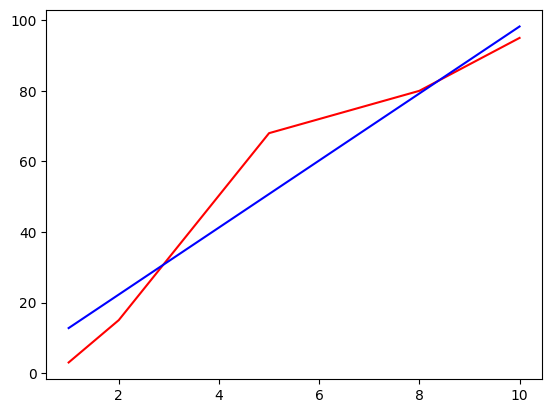

In [139]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')
plt.show()

In [140]:
# 라이브러리를 사용하여 표준화(StandardScaler이용) / -3에서 3사이로 눌러짐
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() #x_data를 표준화할 객체 
scaler_y = StandardScaler() #y_data를 표준화할 객체
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))



[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[-1.22474487 -1.34819316]
 [-0.93313895 -1.01936556]
 [-0.05832118  0.43295634]
 [ 0.81649658  0.76178394]
 [ 1.39970842  1.17281844]]


In [141]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W,b
W = tf.Variable(tf.random.normal([1])) # 초기화
b = tf.Variable(tf.random.normal([1])) # 초기화
# Hypothesis(예측값)
H = W*x + b
# 손실함수 
cost = tf.reduce_mean(tf.square(H-y))
# 결사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W,b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step,
                                                 cost_val,
                                                 W_val,
                                                 b_val
        ))

0째 : cost:1.494888424873352, W:[0.90654826], b:[-1.1927636]
600째 : cost:0.19230052828788757, W:[0.94961816], b:[-0.35882232]
1200째 : cost:0.0744158923625946, W:[0.962575], b:[-0.10794555]
1800째 : cost:0.06374727934598923, W:[0.96647286], b:[-0.03247348]
2400째 : cost:0.06278176605701447, W:[0.9676454], b:[-0.00976907]
3000째 : cost:0.06269439309835434, W:[0.9679977], b:[-0.00293885]
3600째 : cost:0.0626864805817604, W:[0.968105], b:[-0.00088409]
4200째 : cost:0.0626857727766037, W:[0.96813506], b:[-0.00026595]
4800째 : cost:0.06268570572137833, W:[0.96813506], b:[-7.998711e-05]
5400째 : cost:0.06268569082021713, W:[0.96813506], b:[-2.4044126e-05]
6000째 : cost:0.06268568336963654, W:[0.96813506], b:[-7.2144758e-06]
6600째 : cost:0.06268569827079773, W:[0.96813506], b:[-2.1517403e-06]
7200째 : cost:0.06268570572137833, W:[0.96813506], b:[-6.285987e-07]
7800째 : cost:0.06268569082021713, W:[0.96813506], b:[-1.6907005e-07]
8400째 : cost:0.06268569827079773, W:[0.96813506], b:[-3.6144623e-08]
9000째 :

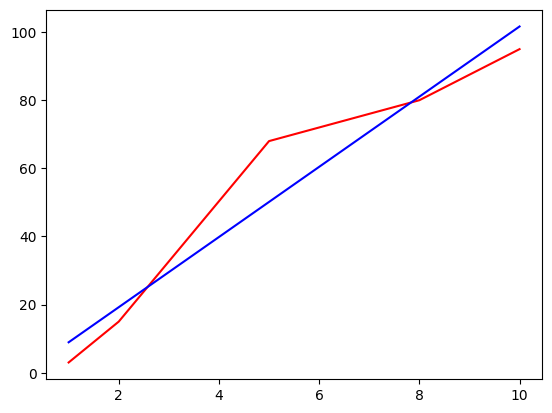

In [143]:
# 예측 : x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')
plt.show()